# ပီတာနှင့်ဝက်ဝံ: Reinforcement Learning အခြေခံသင်ခန်းစာ

ဒီသင်ခန်းစာမှာ၊ path finding ပြဿနာကို ဖြေရှင်းဖို့ Reinforcement learning ကို ဘယ်လိုအသုံးပြုရမလဲဆိုတာကို လေ့လာပါမယ်။ ဒီအခြေအနေကို ရုရှားတေးရေးဆရာ [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev) ရဲ့ [Peter and the Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) ဆိုတဲ့ ဂီတပုံပြင်ကနေ အားယူထားပါတယ်။ ဒီပုံပြင်ကတော့ အိမ်ကနေတောထဲကို ဝက်ဝံကိုလိုက်ဖမ်းဖို့ ရဲရင့်စွာထွက်လာတဲ့ လူငယ်ပီတာအကြောင်းဖြစ်ပါတယ်။ ပီတာကို ပတ်ဝန်းကျင်ကို စူးစမ်းဖို့နဲ့ အကောင်းဆုံး navigation map တည်ဆောက်ဖို့ ကူညီပေးနိုင်တဲ့ machine learning algorithm တွေကို သင်ကြားမယ်။

ပထမဦးဆုံး၊ အသုံးဝင်တဲ့ library တွေကို import လုပ်ကြရအောင်:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## အကျဉ်းချုပ် - Reinforcement Learning

**Reinforcement Learning** (RL) ဆိုသည်မှာ **ပတ်ဝန်းကျင်** တစ်ခုအတွင်း **အေးဂျင့်** တစ်ယောက်၏ အကောင်းဆုံးအပြုအမူကို စမ်းသပ်မှုများစွာပြုလုပ်ခြင်းအားဖြင့် သင်ယူနိုင်စေသော သင်ယူမှုနည်းလမ်းတစ်ရပ်ဖြစ်သည်။ ဒီပတ်ဝန်းကျင်အတွင်းရှိ အေးဂျင့်သည် **reward function** တစ်ခုဖြင့် သတ်မှတ်ထားသော **ရည်မှန်းချက်** တစ်ခုရှိရမည်။

## ပတ်ဝန်းကျင်

ရိုးရှင်းစွာပြောရမည်ဆိုပါက Peter ၏ ကမ္ဘာကို `width` x `height` အရွယ်အစားရှိသော စတုရန်းပုံဖွဲ့ထားသော ဘုတ်အဖွဲ့တစ်ခုအဖြစ် စဉ်းစားကြည့်ပါ။ ဒီဘုတ်အဖွဲ့အတွင်းရှိ အခန်းကဏ္ဍတစ်ခုစီသည် အောက်ပါအတိုင်းဖြစ်နိုင်ပါသည်-
* **မြေပြင်** - Peter နှင့် အခြားတိရစ္ဆာန်များ လမ်းလျှောက်နိုင်သောနေရာ
* **ရေ** - သင်မလမ်းလျှောက်နိုင်သောနေရာ
* **သစ်ပင်** သို့မဟုတ် **မြက်ခင်း** - အနားယူနိုင်သောနေရာ
* **ပန်းသီး** - Peter အတွက် အစားအစာရရှိစေမည့်အရာ
* **ဝက်ဝံ** - အန္တရာယ်ရှိပြီး ရှောင်ရှားရမည့်အရာ

ဒီပတ်ဝန်းကျင်နှင့် အလုပ်လုပ်ရန်အတွက် `Board` ဟုခေါ်သော class တစ်ခုကို သတ်မှတ်မည်ဖြစ်သည်။ ဒီ notebook ကို အလွန်ရှုပ်ထွေးစေမည့်အစား, ဘုတ်အဖွဲ့နှင့် အလုပ်လုပ်ရန်လိုအပ်သော code အားလုံးကို `rlboard` module အတွင်းသို့ သီးခြားထားလိုက်ပါသည်။ ယခုအခါမှာတော့ ဒီ module ကို import ပြုလုပ်မည်ဖြစ်သည်။ အကောင်အထည်ဖော်မှု၏ အတွင်းပိုင်းအသေးစိတ်ကို သိလိုပါက ဒီ module အတွင်းကို ကြည့်ရှုနိုင်ပါသည်။


အခုတော့ အမှတ်တရဘုတ်ပြားတစ်ခု ဖန်တီးပြီး ဒါကို ဘယ်လိုပုံပေါ်လဲဆိုတာ ကြည့်ကြရအောင်:


In [4]:
# code block 1

## လုပ်ဆောင်မှုများနှင့် မူဝါဒ

ဥပမာအရ၊ Peter ရဲ့ရည်မှန်းချက်က ပန်းသီးကိုရှာဖွေဖို့ဖြစ်ပြီး ဝံပုလွေနှင့်အခြားအတားအဆီးများကိုရှောင်ရှားဖို့ဖြစ်ပါတယ်။ အဲ့ဒီလုပ်ဆောင်မှုများကို dictionary အနေနဲ့သတ်မှတ်ပြီး၊ ဆက်စပ်နေတဲ့ကိုဩဒိနိတ်ပြောင်းလဲမှုများကိုအတွဲအဖြစ်ချိတ်ဆက်ပါ။


In [5]:
# code block 2

ကျွန်တော်တို့ရဲ့ ကိုယ်စားလှယ် (Peter) ရဲ့ မူဝါဒကို **policy** လို့ခေါ်တဲ့ အရာတစ်ခုနဲ့ သတ်မှတ်ထားပါတယ်။ အရိုးရှင်းဆုံး မူဝါဒတစ်ခုဖြစ်တဲ့ **random walk** ကို စဉ်းစားကြည့်ရအောင်။

## Random walk

ပထမဆုံးအနေနဲ့ random walk မူဝါဒကို အသုံးပြုပြီး ကျွန်တော်တို့ရဲ့ ပြဿနာကို ဖြေရှင်းကြည့်ရအောင်။


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## အကျိုးခံစားခွင့် ဖန်တီးမှု

ကျွန်ုပ်တို့၏ မူဝါဒကို ပိုမိုထက်မြက်စေရန်အတွက် ဘယ်လှုပ်ရှားမှုတွေက "ပိုကောင်း" သလဲဆိုတာကို နားလည်ရပါမယ်။


In [8]:
#code block 5

## Q-Learning

Q-Table သို့မဟုတ် multi-dimensional array တစ်ခုကို တည်ဆောက်ပါ။ ကျွန်ုပ်တို့၏ board သည် `width` x `height` အတိုင်းအတာရှိသည့်အတွက် Q-Table ကို `width` x `height` x `len(actions)` အရွယ်အစားရှိ numpy array ဖြင့် ကိုယ်စားပြုနိုင်ပါသည်။


In [9]:
# code block 6

Q-Table ကို `plot` function သို့ ပေးပို့ပြီး ဘုတ်အဖွဲ့ပေါ်တွင် ဇယားကို မြင်နိုင်ရန် ပြုလုပ်ပါ။


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learning အဓိက: Bellman Equation နှင့် သင်ယူမှု Algorithm

သင်ယူမှု algorithm အတွက် pseudo-code ရေးပါ:

* Q-Table Q ကို state နဲ့ action အားလုံးအတွက် တန်းတူနံပါတ်များဖြင့် initialize လုပ်ပါ
* သင်ယူနှုန်း $\alpha\leftarrow 1$ ကို သတ်မှတ်ပါ
* စမ်းသပ်မှုများစွာ ပြန်လုပ်ပါ
   1. အမှတ်တစ်ခု random နေရာမှာ စတင်ပါ
   1. ထပ်လုပ်ပါ
        1. state $s$ မှာ action $a$ ကို ရွေးပါ
        2. action ကို အကောင်အထည်ဖော်ပြီး state အသစ် $s'$ ကို ရောက်ပါ
        3. အဆုံးသတ်ဂိမ်းအခြေအနေကို တွေ့ရင်၊ ဒါမှမဟုတ် စုစုပေါင်း reward အလွန်နည်းနေပါက - စမ်းသပ်မှုကို ရပ်ပါ  
        4. state အသစ်မှာ reward $r$ ကို တွက်ပါ
        5. Bellman equation အတိုင်း Q-Function ကို update လုပ်ပါ: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$ ကို ပြောင်းပါ
        7. စုစုပေါင်း reward ကို update လုပ်ပြီး $\alpha$ ကို လျော့ပါ။

## ရှာဖွေမှု vs. အကျိုးအမြတ်

အကောင်းဆုံးနည်းလမ်းက ရှာဖွေမှုနဲ့ အကျိုးအမြတ်အကြားကို ထိန်းညှိဖို့ပါ။ ပတ်ဝန်းကျင်အကြောင်းပိုမိုသိလာတာနဲ့အမျှ အကောင်းဆုံးလမ်းကြောင်းကို လိုက်နာဖို့ ပိုမိုဖြစ်လာနိုင်ပါတယ်၊ သို့သော် မကြိုးစားရသေးတဲ့လမ်းကြောင်းကို တစ်ခါတစ်ရံ ရွေးဖို့လည်း လိုအပ်ပါတယ်။

## Python အကောင်အထည်ဖော်မှု

အခုတော့ သင်ယူမှု algorithm ကို အကောင်အထည်ဖော်ဖို့ အဆင်သင့်ဖြစ်ပါပြီ။ ဒါမတိုင်မီ Q-Table ထဲမှာရှိတဲ့ မည်သည့်နံပါတ်မဆို action တွေကို ကိုယ်စားပြုတဲ့ probability vector အဖြစ် ပြောင်းပေးမယ့် function တစ်ခုလည်း လိုအပ်ပါတယ်:


In [10]:
# code block 7

မူရင်းဗက်တာတွင် ပါဝင်သော အစိတ်အပိုင်းအားလုံး တူညီနေသော အခြေအနေတွင် 0 ဖြင့်စားခြင်းကို ရှောင်ရှားရန်အတွက် `eps` အနည်းငယ်ကို မူရင်းဗက်တာတွင် ထည့်သွင်းပါသည်။

အမှန်တကယ် သင်ယူမှု အယ်လဂိုရစ်သမ်ကို **epochs** ဟုခေါ်သော 5000 ကြိမ် စမ်းသပ်မှုများအတွက် အကောင်အထည်ဖော်မည်:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

ဒီအယ်လဂိုရီသင့်ကို အကောင်အထည်ဖော်ပြီးနောက်၊ Q-Table ကို အဆင့်တစ်ခုချင်းစီတွင် အခြားအရေးယူမှုများ၏ ဆွဲဆောင်မှုကို သတ်မှတ်သော တန်ဖိုးများဖြင့် အပ်ဒိတ်လုပ်ထားသင့်သည်။ အောက်တွင် ဇယားကို မြင်နိုင်ပါသည်။


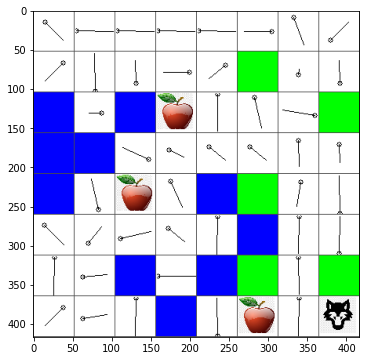

In [43]:
m.plot(Q)

## မူဝါဒကို စစ်ဆေးခြင်း

Q-Table သည် အခြေအနေတစ်ခုစီတွင် လုပ်ဆောင်မှုတစ်ခုစီ၏ "ဆွဲဆောင်မှု" ကို ဖော်ပြထားသောကြောင့် ကျွန်ုပ်တို့၏ကမ္ဘာတွင် ထိရောက်သော လမ်းကြောင်းရှာဖွေမှုကို သတ်မှတ်ရန် အလွယ်တကူ အသုံးပြုနိုင်ပါသည်။ အလွယ်ဆုံးအခြေအနေတွင် Q-Table အတန်ဖိုးအမြင့်ဆုံးနှင့် ကိုက်ညီသော လုပ်ဆောင်မှုကို ရွေးချယ်နိုင်ပါသည်။


In [13]:
# code block 9

2

အကယ်၍ အပေါ်ရှိ ကုဒ်ကို အကြိမ်ကြိမ် စမ်းကြည့်ပါက တစ်ခါတစ်ရံ "တိတ်ဆိတ်" သွားပြီး notebook ထဲမှာ STOP ခလုတ်ကို နှိပ်ပြီး အတားအဆီးဖြေရှင်းရနိုင်သည်ကို သတိပြုမိနိုင်ပါသည်။

> **Task 1:** `walk` function ကို ပြင်ဆင်ပြီး လမ်းကြောင်း၏ အရှည်ကို အများဆုံး အဆင့် ၁၀၀ အထိ ကန့်သတ်ရန် ပြုလုပ်ပါ၊ ထို့နောက် အပေါ်ရှိ ကုဒ်သည် အချို့အခါ၌ ဤတန်ဖိုးကို ပြန်ပေးမည်ကို ကြည့်ရှုပါ။

> **Task 2:** `walk` function ကို ပြင်ဆင်ပြီး ယခင်က ရောက်ခဲ့သောနေရာများကို ပြန်မသွားရန် ပြုလုပ်ပါ။ ဤအရာသည် `walk` ကို looping မဖြစ်စေသော်လည်း၊ agent သည် ထွက်မရနိုင်သောနေရာတွင် "ပိတ်မိ" သွားနိုင်သည်။


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


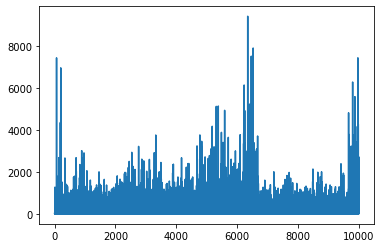

In [57]:
plt.plot(lpath)

## လေ့ကျင့်မှု  
## ပီတာနဲ့ ဝေါ့ဖ်ရဲ့ ပိုမိုအမှန်တရားဆန်တဲ့ ကမ္ဘာ  




---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ဆိုမှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်ပါသည်။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူ့ဘာသာပြန်ပညာရှင်များမှ ပြန်ဆိုမှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်ဆိုမှုကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပါယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
